# Gradient Descent

''' Gradient descent is an optimization algorithm used to minimize cost function by iteratively moving in the direction of steepest descent as defined by the negative of the gradient. '''

In [1]:
# Importing Necessary Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Reading Data
data = pd.read_csv('data.csv')
print(data.shape)
data.head()

(100, 2)


,x,y
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [3]:
# Cost Function
def cost_function(x, y, weight, bias):
    n = len(x)
    total_error = 0.0
    for i in range(n):
        total_error += (y[i] - (weight*x[i] + bias))**2
    return total_error / float(n)

In [4]:
# Gradient Descent
def update_weights(x, y, weight, bias, alpha):
    weight_deriv = 0
    bias_deriv = 0
    n = len(x)

    for i in range(n):
        
        # Calculate partial derivatives
        # -2x(y - (mx + b))
        weight_deriv += -(2/float(n)) * x[i] * (y[i] - (weight*x[i] + bias))

        # -2(y - (mx + b))
        bias_deriv += -(2/float(n))*(y[i] - (weight*x[i] + bias))

    # We subtract because the derivatives point in direction of steepest ascent
    weight -= weight_deriv * alpha
    bias -= bias_deriv  * alpha

    return weight, bias

In [5]:
# Training
def train(x, y, weight, bias, alpha, epochs):

    for epoch in range(epochs):
        weight,bias = update_weights(x, y, weight, bias, alpha)

        #Calculate cost for auditing purposes
        cost = cost_function(x, y, weight, bias)

        # Log Progress
        if epoch % 10 == 0:
            print("epoch : {:d}    weight = {:.2f}    bias = {:.4f}    cost = {}".format(epoch, weight, bias, cost))
        
        # Optimization
        if cost < 1e-6 :
            break

    return weight, bias,

In [6]:
# Initializing parameters
x = data['x'].values
y = data['y'].values
w = 0.45
b = 0.25
alpha = 0.0001 # hyperparameters
epochs = 1000 # hyperparameters
[w, b] = train(x, y, w, b, alpha, epochs)
print([w, b])

epoch : 0    weight = 0.96    bias = 0.2601    cost = 770.467073922352
epoch : 10    weight = 1.47    bias = 0.2708    cost = 112.50823441111345
epoch : 20    weight = 1.47    bias = 0.2714    cost = 112.50722546986779
epoch : 30    weight = 1.47    bias = 0.2719    cost = 112.50688586894816
epoch : 40    weight = 1.47    bias = 0.2725    cost = 112.50654631996994
epoch : 50    weight = 1.47    bias = 0.2731    cost = 112.5062068222445
epoch : 60    weight = 1.47    bias = 0.2737    cost = 112.50586737576437
epoch : 70    weight = 1.47    bias = 0.2743    cost = 112.50552798052158
epoch : 80    weight = 1.47    bias = 0.2748    cost = 112.50518863650845
epoch : 90    weight = 1.47    bias = 0.2754    cost = 112.50484934371735
epoch : 100    weight = 1.47    bias = 0.2760    cost = 112.50451010214043
epoch : 110    weight = 1.47    bias = 0.2766    cost = 112.50417091177007
epoch : 120    weight = 1.47    bias = 0.2772    cost = 112.50383177259842
epoch : 130    weight = 1.47    bias = 

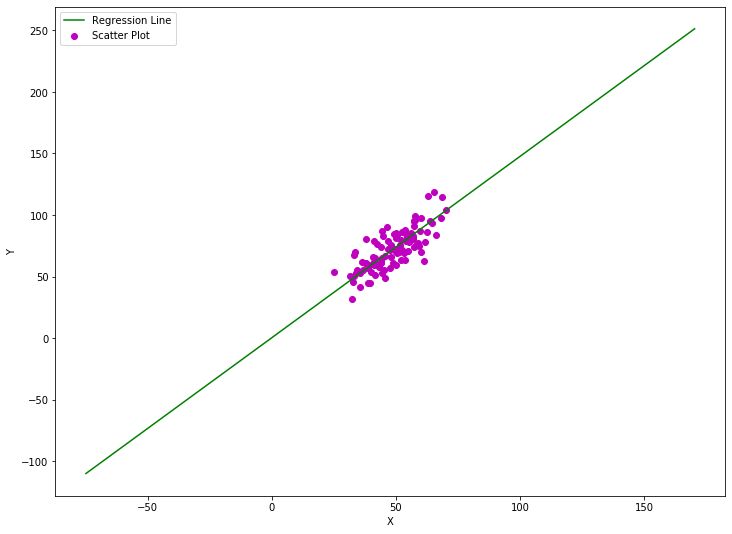

In [7]:
# Visualising
max_x = np.max(data['x'].values) + 100
min_x = np.min(data['x'].values) - 100
# Calculating line values x and y
x = np.linspace(min_x, max_x, 1000)
y = b + w * x
plt.rcParams['figure.figsize'] = (12.0, 9.0)
# Ploting Scatter Points
plt.scatter(data['x'].values, data['y'].values, color = "m", label='Scatter Plot')
# Ploting Line
plt.plot(x, y, color = 'g', label='Regression Line')

plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()